In [ ]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 13.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sktime.utils.plotting import plot_series
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from sktime.datatypes import convert

from sklearn.model_selection import cross_val_score


Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Power_flow_data'


/content/drive/My Drive/Power_flow_data


In [ ]:
import pandas as pd
from glob import glob

# Get a list of all CSV files in the folder
file_paths = glob('*.csv')

# Read and concatenate all CSV files
dfs = [pd.read_csv(file) for file in file_paths]
data = pd.concat(dfs, ignore_index=True)


In [ ]:
data.count

<bound method DataFrame.count of                     Timestamp DayOfWeek  PowerLineID  PowerFlowValue
0         2010-07-01 18:05:00  Thursday         1153            0.00
1         2010-07-01 18:05:00  Thursday         1559            0.00
2         2010-07-01 18:05:00  Thursday          695           81.41
3         2010-07-01 18:05:00  Thursday          842           80.81
4         2010-07-01 18:05:00  Thursday          982         -147.99
...                       ...       ...          ...             ...
47783119  2010-09-25 22:15:00  Saturday          674           27.67
47783120  2010-09-25 22:15:00  Saturday         1112           32.99
47783121  2010-09-25 22:15:00  Saturday          134         -447.93
47783122  2010-09-25 22:15:00  Saturday          470            6.43
47783123  2010-09-25 22:15:00  Saturday          530           76.66

[47783124 rows x 4 columns]>

In [ ]:


file_path = '/content/drive/My Drive/PoweFlowData/concatenated_data.csv'

In [ ]:
#data = pd.read_csv(file_path)
print(data.head())

             Timestamp DayOfWeek  PowerLineID  PowerFlowValue
0  2010-07-01 18:05:00  Thursday         1153            0.00
1  2010-07-01 18:05:00  Thursday         1559            0.00
2  2010-07-01 18:05:00  Thursday          695           81.41
3  2010-07-01 18:05:00  Thursday          842           80.81
4  2010-07-01 18:05:00  Thursday          982         -147.99


In [ ]:
unique_ids = data['PowerLineID'].unique()
unique_ids.shape

(1916,)

In [ ]:
# Filter PowerLineIDs with all PowerFlowValues equal to zero
non_zero_power_line_ids = data[data['PowerFlowValue'] != 0]['PowerLineID'].unique()

# Create a new DataFrame with only the non-zero PowerLineIDs
filtered_data = data[data['PowerLineID'].isin(non_zero_power_line_ids)].copy()



In [ ]:
filtered_data.count

<bound method DataFrame.count of                     Timestamp DayOfWeek  PowerLineID  PowerFlowValue
2         2010-07-01 18:05:00  Thursday          695           81.41
3         2010-07-01 18:05:00  Thursday          842           80.81
4         2010-07-01 18:05:00  Thursday          982         -147.99
6         2010-07-01 18:05:00  Thursday         1770          -41.33
7         2010-07-01 18:05:00  Thursday         1264          -95.94
...                       ...       ...          ...             ...
47783119  2010-09-25 22:15:00  Saturday          674           27.67
47783120  2010-09-25 22:15:00  Saturday         1112           32.99
47783121  2010-09-25 22:15:00  Saturday          134         -447.93
47783122  2010-09-25 22:15:00  Saturday          470            6.43
47783123  2010-09-25 22:15:00  Saturday          530           76.66

[38979657 rows x 4 columns]>

In [ ]:
unique_ids = filtered_data['PowerLineID'].unique()
unique_ids.shape

(1563,)

In [ ]:
# Find the index of the row with the maximum and minimum PowerFlowValue
index_max_power_flow = filtered_data['PowerFlowValue'].idxmax()
index_min_power_flow = filtered_data['PowerFlowValue'].idxmin()

# Extract the corresponding rows
row_max_power_flow = filtered_data.loc[index_max_power_flow]
row_min_power_flow = filtered_data.loc[index_min_power_flow]

print(f'Row with the Highest PowerFlowValue:\n{row_max_power_flow}')
print(f'Row with the Lowest PowerFlowValue:\n{row_min_power_flow}')


Row with the Highest PowerFlowValue:
Timestamp         2010-09-09 19:25:00
DayOfWeek                    Thursday
PowerLineID                         6
PowerFlowValue                1857.41
Name: 38865383, dtype: object
Row with the Lowest PowerFlowValue:
Timestamp         2010-07-26 10:55:00
DayOfWeek                      Monday
PowerLineID                        94
PowerFlowValue                -1871.5
Name: 13148363, dtype: object


In [ ]:
# Find the index of the row with the maximum and minimum PowerLineID
index_max_PowerLineID = filtered_data['PowerLineID'].idxmax()
index_min_PowerLineID  = filtered_data['PowerLineID'].idxmin()

# Extract the corresponding rows
row_max_PowerLineID  = filtered_data.loc[index_max_PowerLineID ]
row_min_PowerLineID  = filtered_data.loc[index_min_PowerLineID ]

print(f'Row with the Highest PowerLineID :\n{row_max_PowerLineID }')
print(f'Row with the Lowest PowerLineID :\n{row_min_PowerLineID }')

Row with the Highest PowerLineID :
Timestamp         2010-07-01 18:05:00
DayOfWeek                    Thursday
PowerLineID                      1890
PowerFlowValue                    0.0
Name: 1584, dtype: object
Row with the Lowest PowerLineID :
Timestamp         2010-07-01 18:05:00
DayOfWeek                    Thursday
PowerLineID                         0
PowerFlowValue                  342.6
Name: 1504, dtype: object


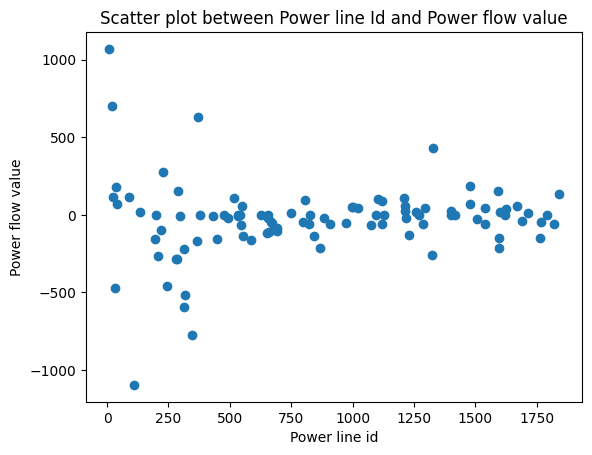

In [ ]:

# Get random 100 rows of the data
rows =filtered_data.sample(n=100, random_state=42)

# Get the time stamp for the last 100 rows
timestamps = rows['Timestamp']

# Get the power flow value and power line id for the last 10 rows
power_flow_values = rows['PowerFlowValue']
power_line_ids = rows['PowerLineID']

# Create a scatter plot
plt.scatter(power_line_ids, power_flow_values)

# Add title and labels
plt.title('Scatter plot between Power line Id and Power flow value')
plt.xlabel('Power line id')
plt.ylabel('Power flow value')

# Show the plot
plt.show()


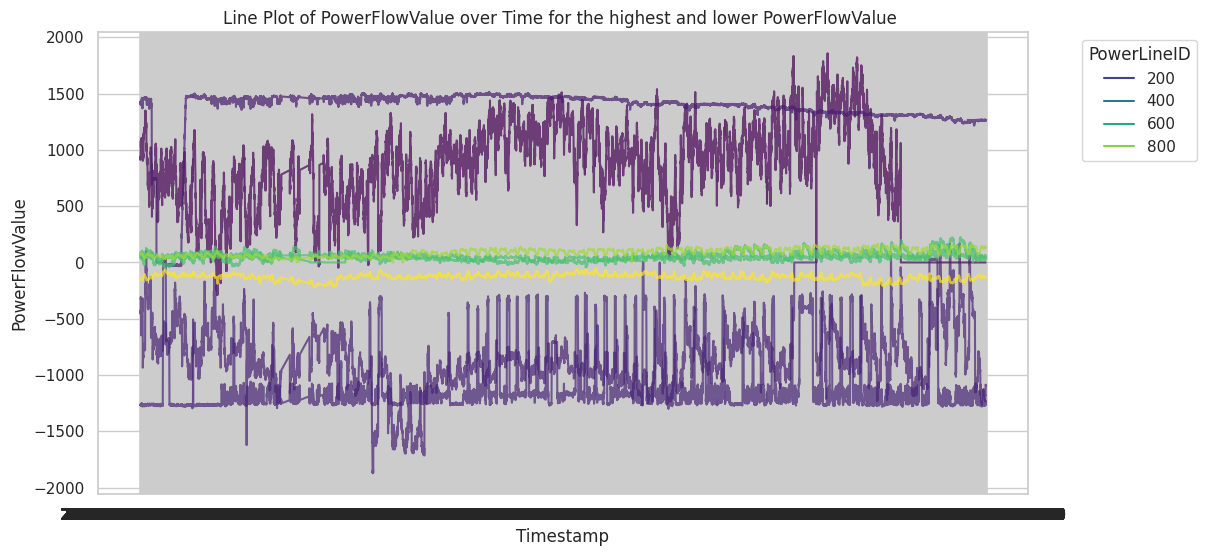

In [ ]:

sns.set(style="whitegrid")

# Filter the data for the  PowerLineIDs here we involove the min and max powerFlowValue
power_line_ids_to_plot = [695, 700,695,  842,  982,85, 109, 6, 94]

subset_data = filtered_data[filtered_data['PowerLineID'].isin(power_line_ids_to_plot)]

# Create a line plot with color-coded PowerLineID
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='PowerFlowValue', hue='PowerLineID', data=subset_data, alpha=0.7, palette='viridis')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('PowerFlowValue')
plt.title('Line Plot of PowerFlowValue over Time for the highest and lower PowerFlowValue ')

# Show legend
plt.legend(title='PowerLineID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


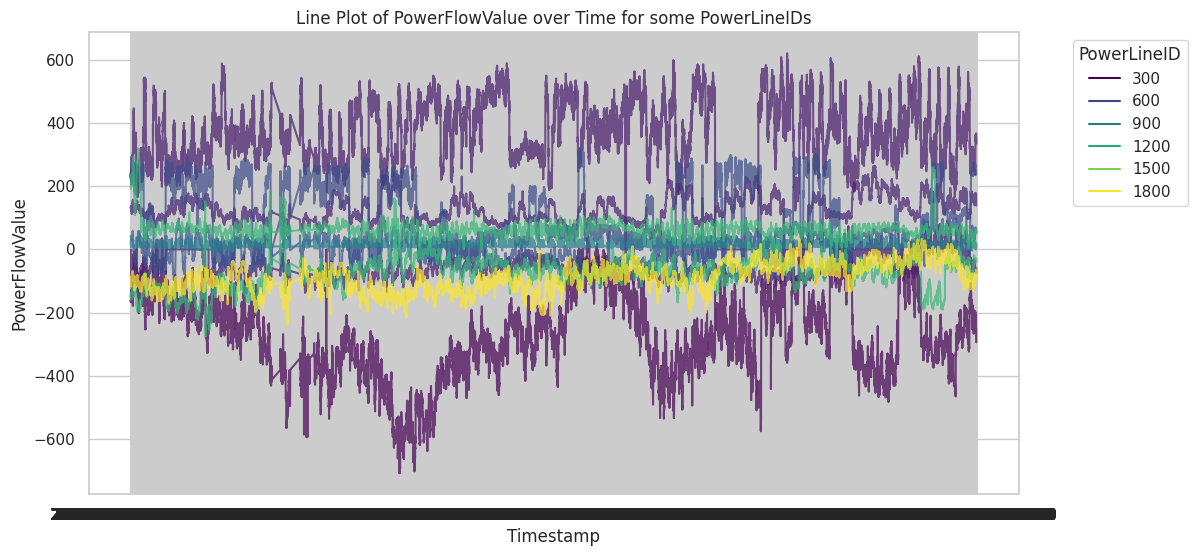

In [ ]:

sns.set(style="whitegrid")

# Randomly sample 25 PowerLineIDs
random_power_line_ids = np.random.choice(filtered_data['PowerLineID'].unique(), size=10, replace=False)

# Filter the data for the sampled PowerLineIDs
subset_data = filtered_data[filtered_data['PowerLineID'].isin(random_power_line_ids)]

# Create a line plot with color-coded PowerLineID
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='PowerFlowValue', hue='PowerLineID', data=subset_data, alpha=0.7, palette='viridis')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('PowerFlowValue')
plt.title('Line Plot of PowerFlowValue over Time for some PowerLineIDs')

# Show legend
plt.legend(title='PowerLineID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


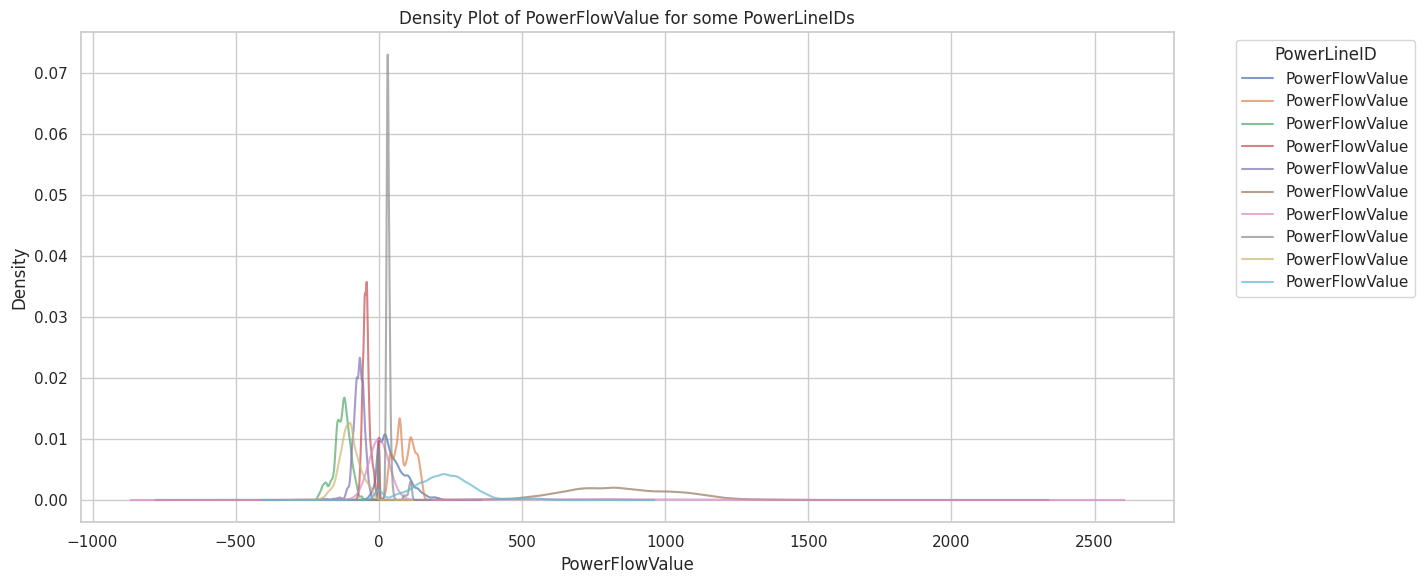

In [ ]:

unique_power_line_ids = filtered_data['PowerLineID'].unique()[:10]  # Extract the first 50 unique PowerLineIDs

# Set the size of the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over unique PowerLineIDs and plot density for each
for i, power_line_id in enumerate(unique_power_line_ids):
    subset_data = filtered_data[filtered_data['PowerLineID'] == power_line_id]
    subset_data[['PowerFlowValue']].plot(kind='density', label=f'PowerLineID {power_line_id}', alpha=0.7, ax=ax)

# Set labels and title
ax.set_xlabel('PowerFlowValue')
ax.set_ylabel('Density')
ax.set_title('Density Plot of PowerFlowValue for some PowerLineIDs')

# Show legend
#ax.legend()
plt.tight_layout()
plt.legend(title='PowerLineID', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()


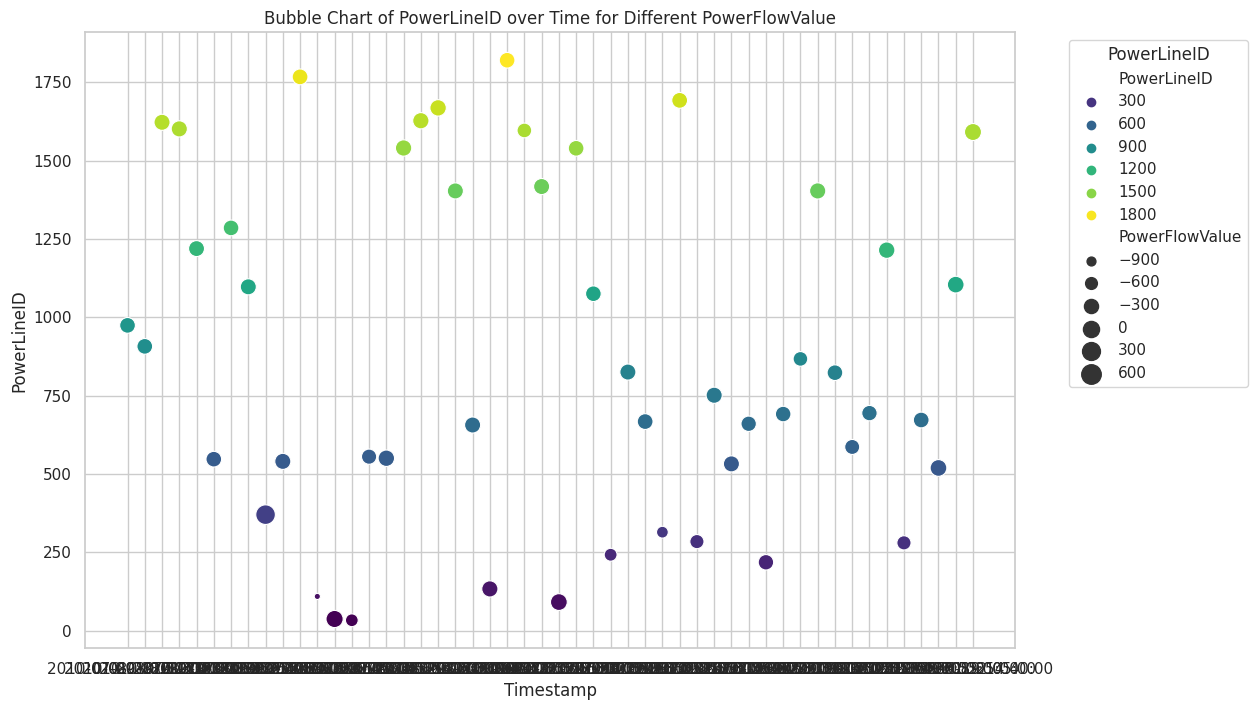

In [ ]:

sampled_data = filtered_data.sample(n=50, random_state=42)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Timestamp', y='PowerLineID', size='PowerFlowValue', hue='PowerLineID', data=sampled_data, sizes=(20, 200), palette='viridis')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('PowerLineID')
plt.title('Bubble Chart of PowerLineID over Time for Different PowerFlowValue')

# Show legend
plt.legend(title='PowerLineID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


<ipython-input-25-0b9567f3bf26>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=filtered_data, x='PowerLineID', ax=ax1, fill=True, alpha=0.7, palette='viridis')


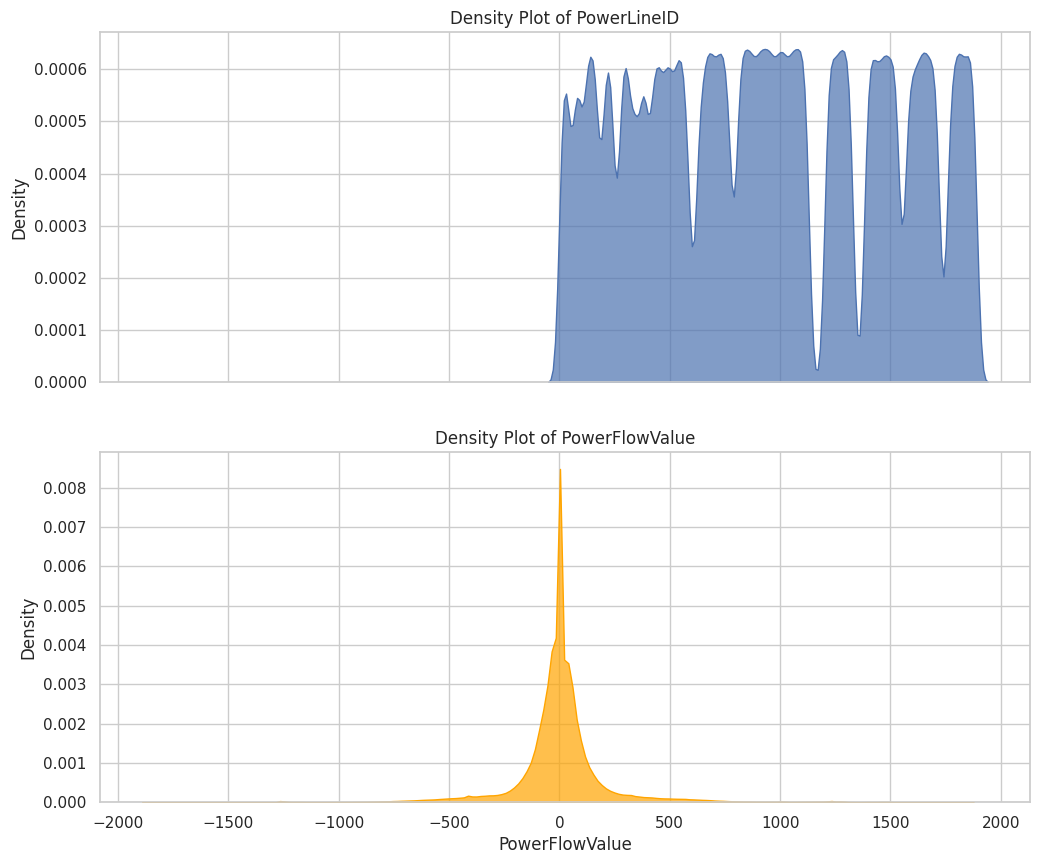

In [ ]:

sns.set(style="whitegrid")

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Density plot for PowerLineID
sns.kdeplot(data=filtered_data, x='PowerLineID', ax=ax1, fill=True, alpha=0.7, palette='viridis')
ax1.set_ylabel('Density')
ax1.set_title('Density Plot of PowerLineID')

# Density plot for PowerFlowValue
sns.kdeplot(data=filtered_data, x='PowerFlowValue', ax=ax2, fill=True, alpha=0.7, color='orange')
ax2.set_xlabel('PowerFlowValue')
ax2.set_ylabel('Density')
ax2.set_title('Density Plot of PowerFlowValue')

# Show the plots
plt.show()


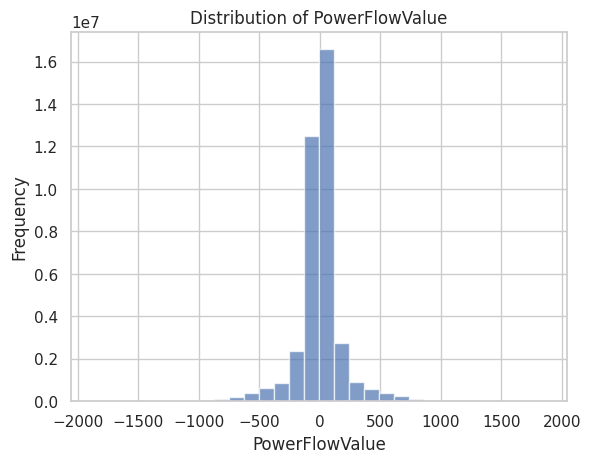

In [ ]:
#Histogram
plt.hist(filtered_data['PowerFlowValue'], bins=30, alpha=0.7)
plt.title('Distribution of PowerFlowValue')
plt.xlabel('PowerFlowValue')
plt.ylabel('Frequency')
plt.show()
